## Experiment 12
### Write a python program to conduct a hypothesis test for unknown variance.

In [21]:
# importing required libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### One Sample T-Test

In [22]:
# Set the random seed for reproducibility
np.random.seed(8)

# Generate a population age distribution with a mean of 40 and a size of 200,000
population_ages1 = stats.poisson.rvs(loc=18, mu=40, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=50000)
population_ages = np.concatenate((population_ages1, population_ages2))

# Generate a sample from a specific state (e.g., Minnesota) with a mean of 35 and a sample size of 50
minnesota_ages1 = stats.poisson.rvs(loc=18, mu=35, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

# Print the mean age of the population and the sample
print("Mean age of the population:", population_ages.mean())
print("Mean age of the sample:", minnesota_ages.mean())


Mean age of the population: 50.48598
Mean age of the sample: 42.92


In [23]:
# Calculate the t-statistic and p-value for the one-sample t-test
t_stat, p_val = stats.ttest_1samp(a=minnesota_ages, popmean=population_ages.mean())

print("The t-statistic is {} and the p-value is {}.".format(t_stat, p_val))

The t-statistic is -4.155007645348416 and the p-value is 0.00012990129848405887.


In [24]:
# Check the quantiles for a 95% confidence level with 49 degrees of freedom
t_quantile_low = stats.t.ppf(q=0.025, df=49)
t_quantile_high = stats.t.ppf(q=0.975, df=49)
print("The t-quantiles for a 95% confidence level with 49 degrees of freedom are {} and {}.".format(t_quantile_low, t_quantile_high))

The t-quantiles for a 95% confidence level with 49 degrees of freedom are -2.0095752344892093 and 2.009575234489209.


In [25]:
# Calculate the p-value with the t-statistic and 49 degrees of freedom
p_val_calculated = stats.t.cdf(x=t_stat, df=49) * 2
print("The calculated p-value is {}.".format(p_val_calculated))

The calculated p-value is 0.00012990129848405887.


In [26]:
# Calculate the standard error of the mean for the sample
sigma = minnesota_ages.std() / math.sqrt(50)

In [27]:
# Construct a 95% confidence interval for the sample mean
conf_int_95 = stats.t.interval(alpha=0.95, df=49, loc=minnesota_ages.mean(), scale=sigma)
print("The 95% confidence interval for the sample mean is {}.".format(conf_int_95))

The 95% confidence interval for the sample mean is (39.29748102093582, 46.542518979064184).


C:\Users\mainp\AppData\Local\Temp\ipykernel_14524\4103696102.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  conf_int_95 = stats.t.interval(alpha=0.95, df=49, loc=minnesota_ages.mean(), scale=sigma)


In [28]:
# Construct a 99% confidence interval for the sample mean
conf_int_99 = stats.t.interval(alpha=0.99, df=49, loc=minnesota_ages.mean(), scale=sigma)
print("The 99% confidence interval for the sample mean is {}.".format(conf_int_99))

The 99% confidence interval for the sample mean is (38.08904034203606, 47.750959657963946).


C:\Users\mainp\AppData\Local\Temp\ipykernel_14524\176364369.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  conf_int_99 = stats.t.interval(alpha=0.99, df=49, loc=minnesota_ages.mean(), scale=sigma)


#### Two Sample T-Test

In [29]:
# Generate a sample of voter age data for Wisconsin
np.random.seed(10)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=15, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

In [30]:
# Print the mean of the Wisconsin sample
print("Wisconsin Sample Mean:", wisconsin_ages.mean())

Wisconsin Sample Mean: 41.8


In [31]:
# Perform a two-sample t-test to compare the Wisconsin sample to the Minnesota sample
t_stat, p_val = stats.ttest_ind(a=minnesota_ages, b=wisconsin_ages, equal_var=False)

In [32]:
# Print the p-value
print("P-Value:", p_val)

P-Value: 0.6175514813720644


In [33]:
# Check if the p-value is less than the significance level of 0.05
if p_val < 0.05:
    print("Reject null hypothesis, the means are different.")
else:
    print("Fail to reject null hypothesis, the means are the same.")

Fail to reject null hypothesis, the means are the same.


#### Paired T-Test

In [34]:
# set the random seed for reproducibility
np.random.seed(11)

# generate weight data before and after treatment
before = stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

# create a dataframe to store the weight data
weight_df = pd.DataFrame({"weight_before": before,
                          "weight_after": after,
                          "weight_change": after - before})

# print a summary of the weight data
print(weight_df.describe())

       weight_before  weight_after  weight_change
count     100.000000    100.000000     100.000000
mean      250.345546    249.115171      -1.230375
std        28.132539     28.422183       4.783696
min       170.400443    165.913930     -11.495286
25%       230.421042    229.148236      -4.046211
50%       250.830805    251.134089      -1.413463
75%       270.637145    268.927258       1.738673
max       314.700233    316.720357       9.759282


In [35]:
# conduct a paired t-test to check if the means of the samples differ
t_statistic, p_value = stats.ttest_rel(a=before, b=after)

In [36]:
# print the p-value
print("Paired t-test p-value:", p_value)

Paired t-test p-value: 0.011596444318439859


#### Type I and Type II Errors

Text(0, 0.02, 'Type 2 Error')

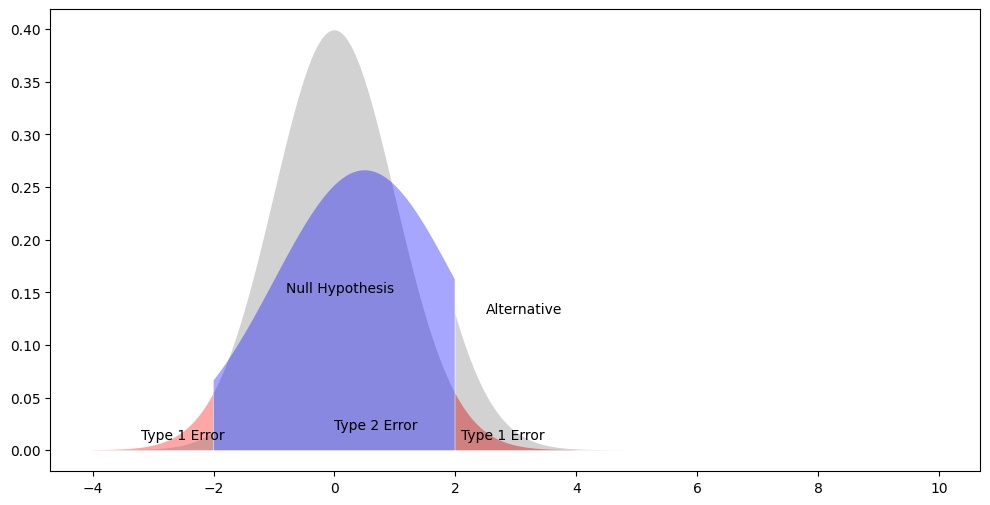

In [41]:
# Generate three normal distributions with different means and standard deviations
null_distribution = stats.norm(loc=0, scale=1)
alternative_distribution = stats.norm(loc=0.5, scale=1)
observed_distribution = stats.norm(loc=0.5, scale=1.5)

# Set the plot size
plt.figure(figsize=(12, 6))

# Fill in the areas corresponding to the null distribution
plt.fill_between(x=np.arange(-4, -2, 0.01), 
                 y1= null_distribution.pdf(np.arange(-4, -2, 0.01)),
                 facecolor='red', alpha=0.35)
plt.fill_between(x=np.arange(-2, 2, 0.01), 
                 y1= null_distribution.pdf(np.arange(-2, 2, 0.01)),
                 facecolor='grey', alpha=0.35)
plt.fill_between(x=np.arange(2, 4, 0.01), 
                 y1= null_distribution.pdf(np.arange(2, 4, 0.01)),
                 facecolor='red', alpha=0.5)

# Fill in the areas corresponding to the alternative and observed distributions
plt.fill_between(x=np.arange(-4, -2, 0.01), 
                 y1= alternative_distribution.pdf(np.arange(-4, -2, 0.01)),
                 facecolor='grey', alpha=0.35)
plt.fill_between(x=np.arange(-2, 2, 0.01), 
                 y1= observed_distribution.pdf(np.arange(-2, 2, 0.01)),
                 facecolor='blue', alpha=0.35)
plt.fill_between(x=np.arange(2, 10, 0.01), 
                 y1= alternative_distribution.pdf(np.arange(2, 10, 0.01)),
                 facecolor='grey', alpha=0.35)

# Add labels to the plot
plt.text(x=-0.8, y=0.15, s="Null Hypothesis")
plt.text(x=2.5, y=0.13, s="Alternative")
plt.text(x=2.1, y=0.01, s="Type 1 Error")
plt.text(x=-3.2, y=0.01, s="Type 1 Error")
plt.text(x=0, y=0.02, s="Type 2 Error")

Type II error rate: 0.000
Power: 1.000


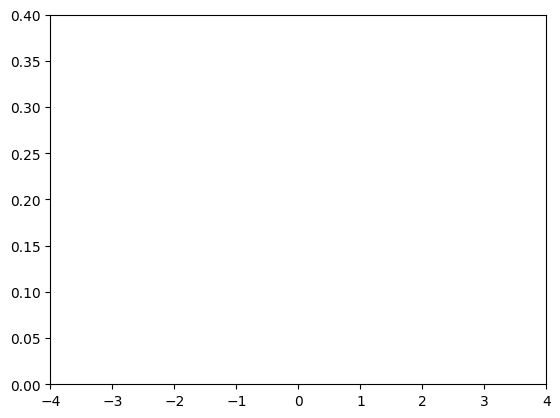

In [38]:
# Set the x and y limits of the plot
plt.xlim([-4, 4])
plt.ylim([0, 0.4])

# Calculate the Type II error rate for the observed distribution compared to the null distribution
alpha = 0.05  # Significance level
z_alpha = stats.norm.ppf(1 - alpha/2)  # Two-tailed z-score corresponding to alpha
z_beta = (0.5 - 0) / (1.5 / np.sqrt(100)) + z_alpha  # z-score corresponding to beta
beta = 1 - stats.norm.cdf(z_beta, loc=0, scale=1)  # Calculate beta
power = 1 - beta  # Calculate power

# Print the Type II error rate and power
print(f"Type II error rate: {beta:.3f}")
print(f"Power: {power:.3f}")

# Show the plot
plt.show()